#**This notebook provides a detailed explanation of linear regression assumptions.**

## To solve all assumptions of linear regression, you need to assess and address each assumption individually. Here are the key assumptions of linear regression and some strategies to address them:

1. Linearity
2. Mean of Residuals
3. Normality of Residuals
4. Homoscedasticity (Constant Variance):
5. No Multicollinearity
6. No Autocorrelation

In [9]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
# sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os

In [10]:
data = pd.read_csv('/content/advertising.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
sns.set(style = 'darkgrid')

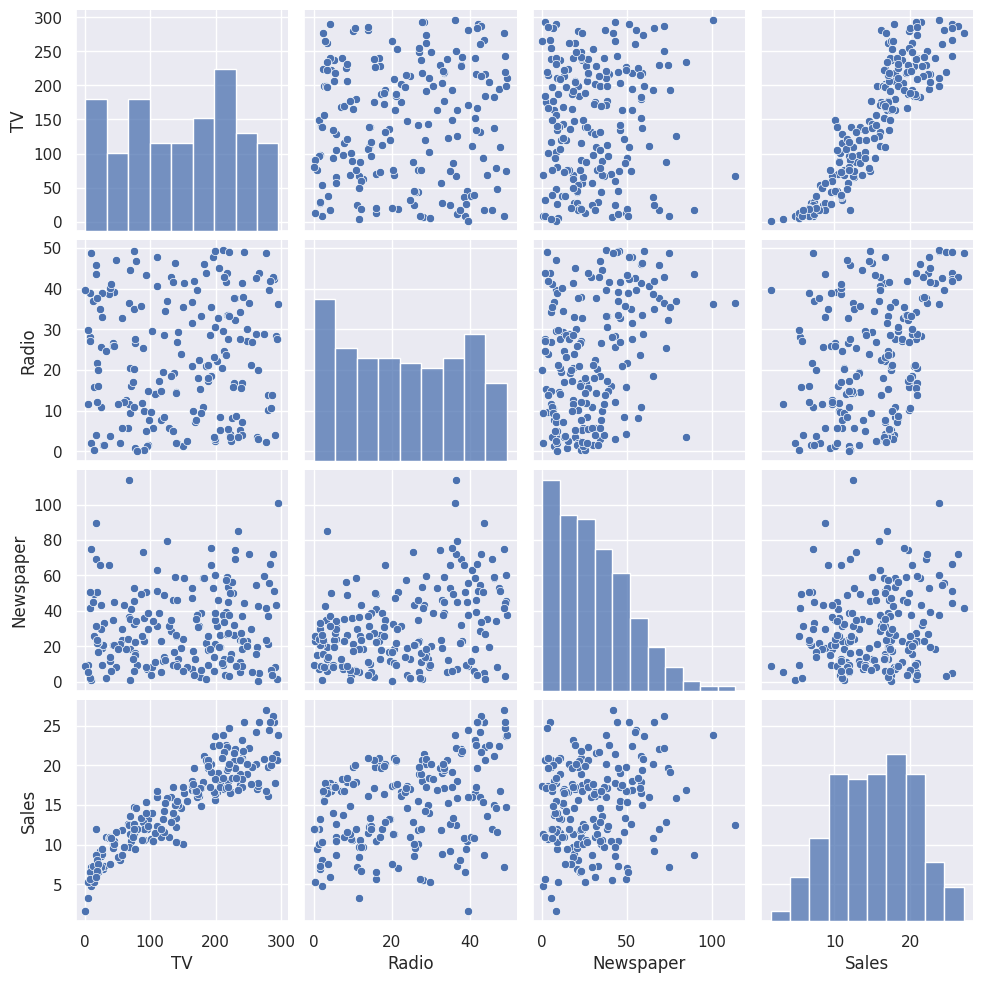

In [ ]:
sns.pairplot(data)

<Axes: >

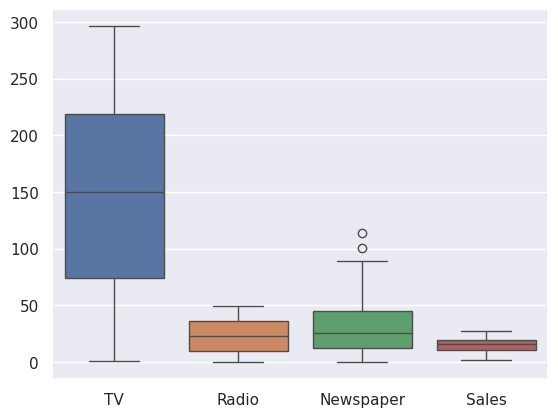

In [ ]:
sns.boxplot(data)

### **Linearity**

#### <font color='#0094c9'>The relationship between the independent and dependent variables should be linear. We can use scatter plots to visually inspect the linearity between variables. So here we will check the relationship between independent varilables and our dependent variable "Sales"</font>

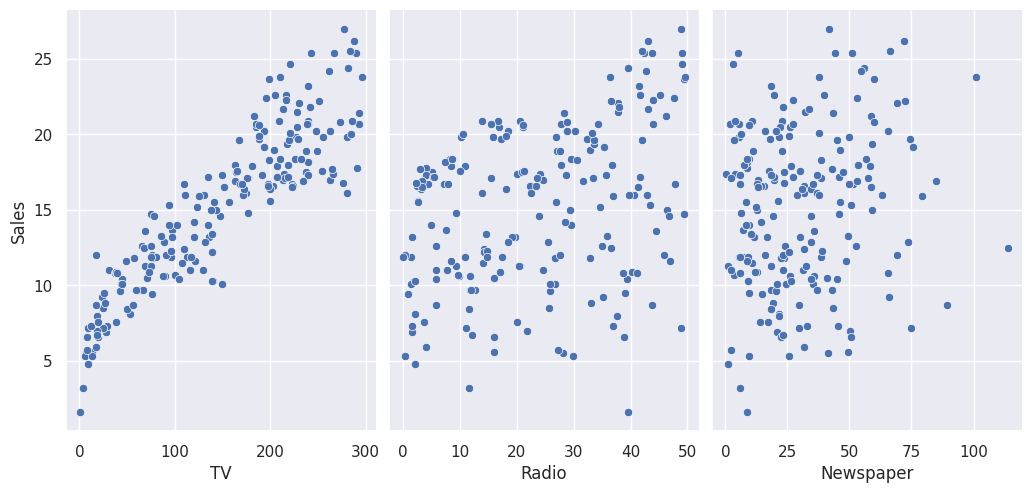

In [ ]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5, aspect=0.7)

Looking at the plots, we can observe that with the Sales variable, none of the independent variables form an exactly linear shape, although TV and Radio do better than newspapers, which seem to have no different shape. As a result, it appears that a linear regression model is not the best match. A linear model may be unable to accurately represent the data in terms of variability,  accuracy, and so on.

<font color='red'>**Note: If linearity is not observed, consider transforming variables (e.g., log transformation) or using polynomial regression.**</font>

**Now, let's build a ordinary least squares (OLS) regression model, and it will help us solve further assumptions.**

In [39]:
x = data.drop(["Sales"],axis=1)
y = data.Sales

In [34]:
X = sm.add_constant(x)  # Adding a constant to include the intercept in the model
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

In [40]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))
print("MSE: {}".format(mean_squared_error(y_true=y,y_pred=y_pred)))

R squared: 0.9025912899684558
MSE: 2.706006147627315


### **Mean of Residuals**

#### <font color='0094c9'>Residuals, as we know, are the differences between actual and predicted values. Linear regression assumes that the mean of the residuals is zero. So let's find out.</font>

In [41]:
residuals = y-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.9968028886505634e-17


Mean of residuals is very close to zero.

### **Normality of Residuals**

#### <font color='0094c9'>The residuals should follow a normal distribution. To address this:     Plot a histogram or Q-Q plot of residuals to assess normality. </font>                

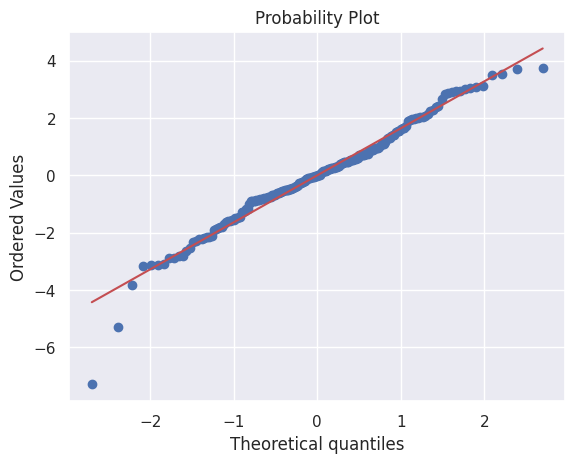

In [42]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

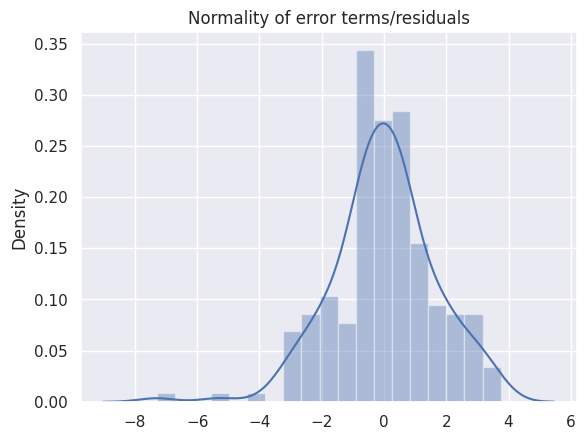

In [20]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

For the amount of test points we used, the residual terms are quite normally distributed. Remember the central limit theorem, which states that as the sample size grows, the distribution tends to become normal. It is extremely difficult to obtain flawless curves and distributions from real-world data.  A little skewness is also visible from the plot.

### **Homoscedasticity**

#### <font color='0094c9'>Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.</font>

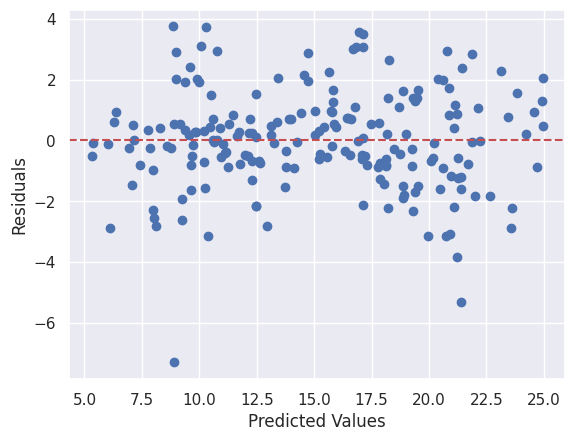

In [ ]:
# Scatter plot of residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Here we are testing for homoscedasticity using p-values from statistical tests such as the Breusch-Pagan test or the White test, the null and alternative hypotheses are as follows:

**Null Hypothesis (H0):** The null hypothesis typically assumes homoscedasticity, meaning that the variance of the residuals is constant across all levels of the independent variables. In other words, it assumes that there is no heteroscedasticity in the model.

**Alternative Hypothesis (H1):** The alternative hypothesis usually suggests the presence of heteroscedasticity, indicating that the variance of the residuals is not constant across all levels of the independent variables. It implies that there is a systematic change in the variance of the residuals.

If the p-value is less than a chosen significance level (0.05), we reject the null hypothesis and conclude that there is evidence of heteroscedasticity in the model.

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Testing homoscedasticity
_, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
print('Breusch-Pagan Test p-value:', p_value)

_, p_value, _, _ = het_white(model.resid, model.model.exog)
print('het_white Test p-value:', p_value)

Breusch-Pagan Test p-value: 0.2637922004319978
het_white Test p-value: 0.018203803931681046


The White Test comes with a few limitations: it needs a lot of variables and hence can be quite time consuming, so using the White Test for a large dataset isn’t too practical and it would be easier to go for Breusch-Pagan Test.

What to do if there is Heteroscedasticity?

1. Outlier removal
2. Log transformation of x variables
3. Polynomial regresion

### No Multicollinearity

#### <font color='#0094c9'>Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the independent variables.</font>

There should be no exact linear relationships between independent variables. If there are variables which are correlated with the dependent variable then this would be a good sign for our model.

<font color='red'>**Note: Multicollinearity influences the coefficients and p-values, but not the predictions, accuracy of predictions, or goodness-of-fit statistics. If your primary purpose is to create predictions and you do not need to understand the significance of each independent variable, there is no need to eliminate severe multicollinearity.**</font>

<Axes: >

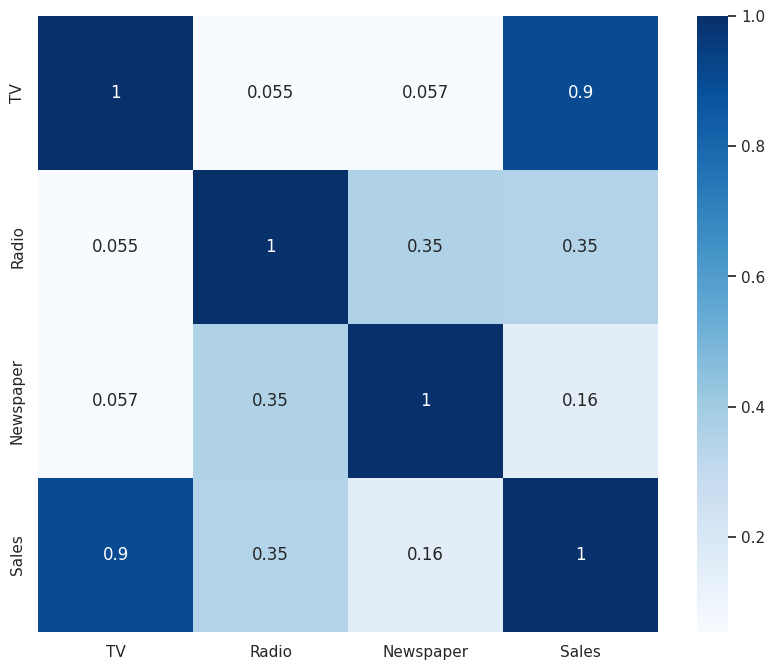

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Blues', annot=True)

Anther way of checking multicollinearity among independent variables  is to use VIF (variance inflation factor). VIF is a measure of the amount of multicollinearity in regression analysis.

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

     feature       VIF
0         TV  2.486772
1      Radio  3.285462
2  Newspaper  3.055245


**VIF values > 10 indicate high multicollinearity. so here everthing seems to be fine**

### **No Autocorrelation**



#### <font color='#0094c9'> Autocorrelation occurs when the residuals (errors) from the model are not independent of each other, meaning that the error for one observation is correlated with the error for a previous observation. This is particularly a concern in time series data, where the assumption of independence may be violated because consecutive observations are often correlated.</font>

<font color='green'>**Example:** Autocorrelation can be found in the field of meteorology, particularly in the study of temperature data. This type of data often exhibits seasonal autocorrelation, where temperatures are dependent not only on the current atmospheric conditions but also on the seasonal patterns observed historically. similarily major holidays and events in e-commerce sales data.</font>

**Below are some of the approaches to test for auto correlation.**

Check for autocorrelation in residuals using plots like autocorrelation function **(ACF)** & **PACF** plots.The ACF plot shows the correlation of a time series with itself at different lags, while the PACF plot shows the correlation of a time series with itself at different lags, after removing the effects of the previous lags.

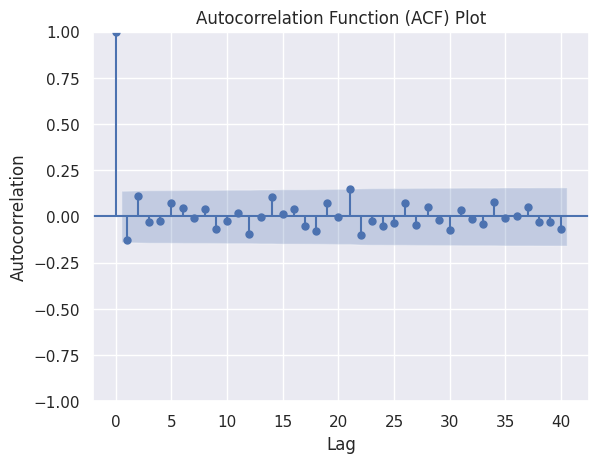

In [74]:
import statsmodels.api as sm
# 'lags' specifies the number of lags to include in the ACF plot
# You can adjust the lags parameter based on your data's seasonality
sm.graphics.tsa.plot_acf(residuals, lags=40)
# Set plot labels and title
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

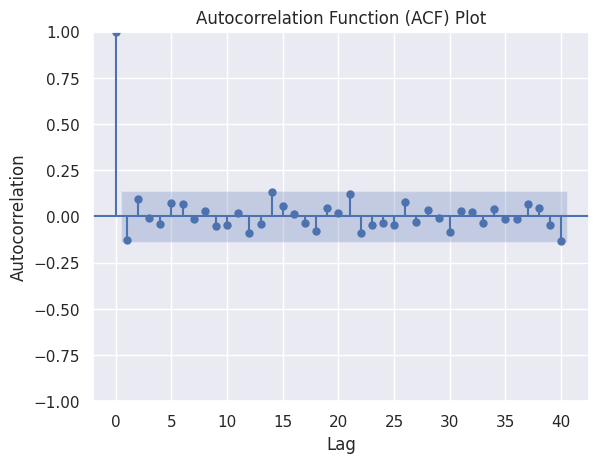

In [76]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

**The shaded regions represent the 95% confidence intervals. Points outside this region may indicate significant autocorrelation.**

**Plotting Residuals:** Visually inspecting a plot of residuals can sometimes reveal patterns indicative of autocorrelation.

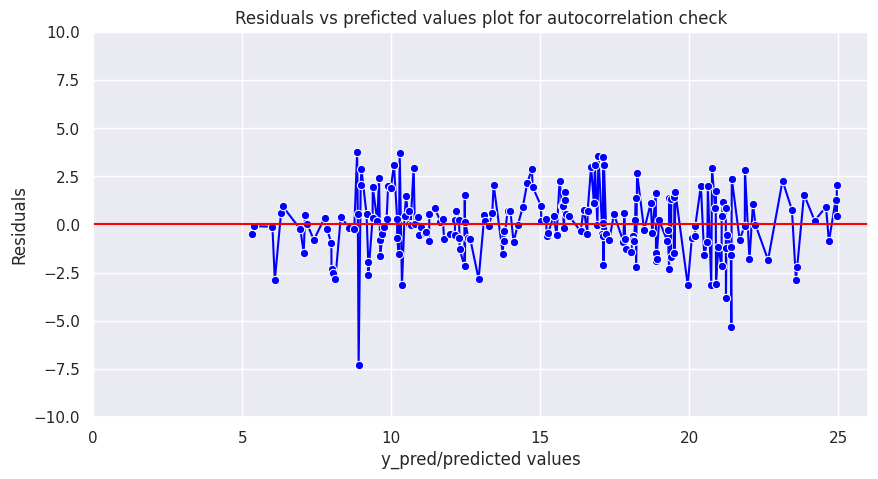

In [53]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot(x=[0,30],y=[0,0],color='red')
p = plt.title('Residuals vs preficted values plot for autocorrelation check')

**Durbin-Watson Test:** Provides a test statistic that can help determine the presence of autocorrelation at lag 1. A value close to 2.0 suggests no autocorrelation, while values approaching 0 indicate positive autocorrelation and values toward 4 indicate negative autocorrelation.


In [55]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson Test
dw_stat = durbin_watson(model.resid)
print('Durbin-Watson Statistic:', dw_stat)

Durbin-Watson Statistic: 2.250551836079356


**Ljung-Box Test:** Useful for checking autocorrelation at all lag lengths up to a specified maximum.

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.\
**Null Hypothesis:** Autocorrelation is absent.\
**Alternative Hypothesis:** Autocorrelation is present.

In [78]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)['lb_pvalue'])

0.0590661559572775

**After examining all of the tests listed above, we may conclude that there is no substantial autocorrelation in the data.**

**If autocorrelation is detected, potential remedies include:**

**Incorporating Lagged Variables:** For time series data, adding lagged terms of the dependent variable as independent variables can help capture temporal dynamics.\
**Differencing:** Applying differencing to the dependent variable can help remove trends and cycles, potentially mitigating autocorrelation.\
**Using Time Series Models:** Models like ARIMA are designed to handle autocorrelation in time series data.

Addressing these assumptions properly can significantly improve your model's accuracy and reliability. It's essential to iteratively check and rectify these assumptions during the modeling process.